### IMPORTING LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
import seaborn as sn

### LOADING DATASET

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### TRAINING THE MODEL OVER THE DATASET

In [5]:
#normalising the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [6]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

In [7]:
#compiling the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [8]:
#training the model over the dataset
model.fit(x_train, y_train, epochs=3, batch_size = 1)

Epoch 1/3
60000/60000 [==============================] - 247s 4ms/step - loss: 0.2246 - accuracy: 0.9338
Epoch 2/3
60000/60000 [==============================] - 234s 4ms/step - loss: 0.1404 - accuracy: 0.9636
Epoch 3/3
60000/60000 [==============================] - 230s 4ms/step - loss: 0.1218 - accuracy: 0.9694


In [9]:
loss, accuracy = model.evaluate(x_test, y_test, batch_size=1)

10000/10000 [==============================] - 34s 3ms/step - loss: 0.2157 - accuracy: 0.9590


In [10]:
#printing the accuracy and loss of the model 
print("loss: ", loss, "\nAccuracy: " ,accuracy)

loss:  0.2156819850206375 
Accuracy:  0.9589999914169312


In [11]:
y_predict = model.predict(x_test)
y_predict = [np.argmax(i) for i in y_predict]

In [12]:
conf_matrix = tf.math.confusion_matrix(y_test, y_predict)

## CONFUSION MATRIX 

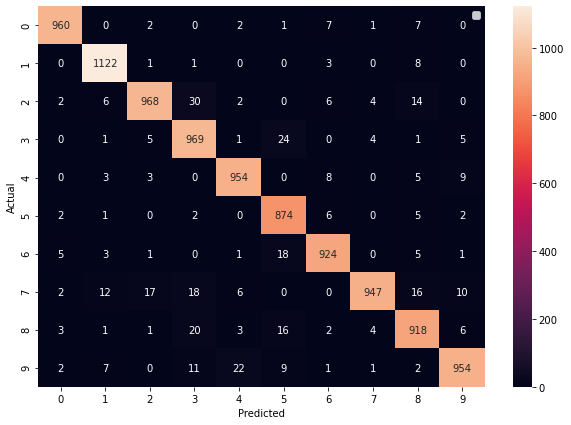

In [13]:
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.legend("confusion matrix")
plt.show()


In [15]:
#saving the model
model.save('handwritten_digit_recognition.model')

INFO:tensorflow:Assets written to: handwritten_digit_recognition.model\assets
